In [1]:
import tensorflow as tf 
import os 


In [2]:
#It combines the directory 'data' with the subdirectory or file 'happy'.
os.path.join('data','happy')

'data\\happy'

In [3]:
#When memory growth is enabled, TensorFlow only allocates memory as needed rather than pre-allocating the entire GPU memory upfront.
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [4]:
import cv2
import imghdr

C:\Users\kah23\AppData\Local\Temp\ipykernel_3340\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = 'data'

In [6]:
image_exts = ['jpeg','jpg','bmp','png']

In [7]:
os.listdir(data_dir)

['happy', 'sad']

In [8]:
for image_class in os.listdir(data_dir):
    #For each image in a class directory, its full path is constructed using os.path.join.
    for image in os.listdir(os.path.join(data_dir , image_class)):
        image_path = os.path.join(data_dir , image_class , image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issues with image {}'.format(image_path))
            

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data',batch_size = 16)
# return first data as [batch_size , 256 , 256 , 3]
# second labels to each image 

Found 348 files belonging to 2 classes.


In [10]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

In [13]:
batch[0].shape

(16, 256, 256, 3)

In [14]:
batch[1].shape
# each has 16 image(batch size) so 16 labels 

(16,)

In [47]:
print(batch[1])
# class 1 - sad
# cass 0 - happy 

[1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1]


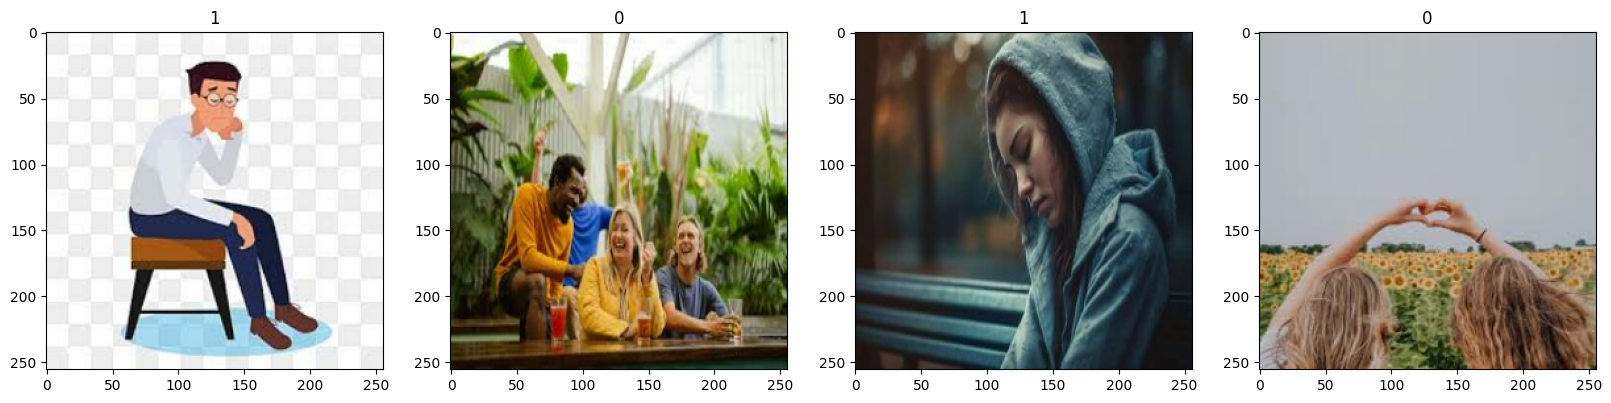

In [16]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(ncols = 4 , figsize = (20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

prepeocessing

In [17]:
# scale data 
data = data.map(lambda x , y : (x/255, y))

In [18]:
scl_itr = data.as_numpy_iterator()

In [19]:
scl_itr.next()[0].max()

np.float32(1.0)

split data

In [20]:
len(data)

22

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size  = int(len(data)*.1)

In [22]:
print(train_size, val_size, test_size)

15 5 2


In [54]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(val_size).take(test_size)

In [55]:
print(len(train), len(val), len(test))

15 5 2


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16,(3,3) , 1 , activation='relu' , input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32 , (3,3) , 1 , activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3) , 1 , activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))


D:\deepL\imageclassf\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile('adam' , loss = tf.losses.BinaryCrossentropy() , metrics = ['accuracy'])

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
logdir = 'logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [32]:
hist = model.fit(train , epochs = 18 ,validation_data = val , callbacks = [tensorboard_callback])

Epoch 1/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 315ms/step - accuracy: 0.4868 - loss: 1.1074 - val_accuracy: 0.7375 - val_loss: 0.5716
Epoch 2/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 346ms/step - accuracy: 0.6553 - loss: 0.6057 - val_accuracy: 0.9000 - val_loss: 0.3689
Epoch 3/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 338ms/step - accuracy: 0.8896 - loss: 0.3578 - val_accuracy: 0.8750 - val_loss: 0.3050
Epoch 4/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 336ms/step - accuracy: 0.9083 - loss: 0.2480 - val_accuracy: 0.9375 - val_loss: 0.1983
Epoch 5/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 327ms/step - accuracy: 0.9033 - loss: 0.2233 - val_accuracy: 0.8750 - val_loss: 0.2900
Epoch 6/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 328ms/step - accuracy: 0.9640 - loss: 0.1149 - val_accuracy: 0.9500 - val_loss: 0.0848
Epoch 7/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 326ms/step - accuracy: 0.9845 - loss: 0.0844 - val_accuracy: 0.9625 - val_loss: 0.1321
Epoch 8/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 333ms/step - accuracy: 0.9823 - loss: 0.0546 - val_accuracy: 0.

In [33]:
hist

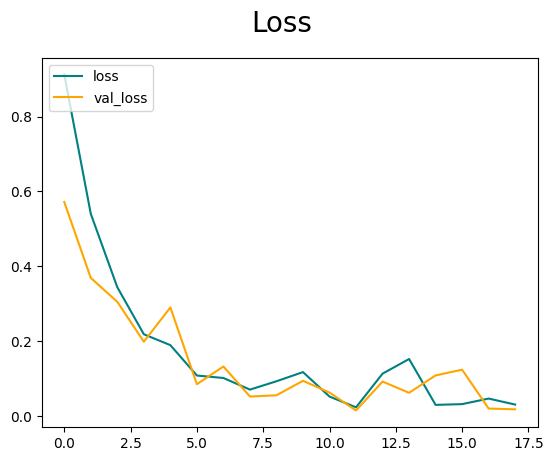

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'] , color = 'teal' , label = 'loss')
plt.plot(hist.history['val_loss'] , color = 'orange' , label = 'val_loss')
fig.suptitle('Loss' , fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

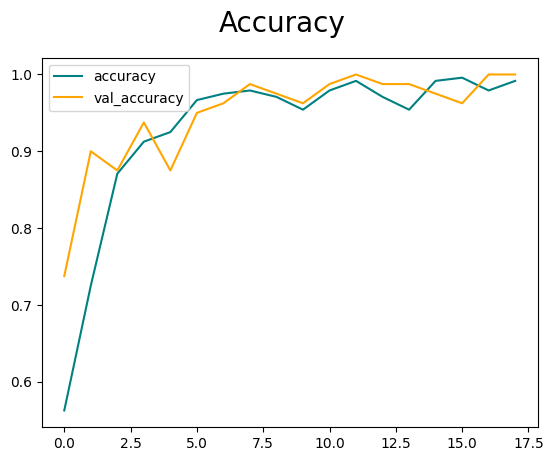

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'] , color = 'teal' , label = 'accuracy')
plt.plot(hist.history['val_accuracy'] , color = 'orange' , label = 'val_accuracy')
fig.suptitle('Accuracy' , fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


In [37]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kah23\AppData\Local\Temp\ipykernel_3340\3485762420.py:2: SyntaxWarning: invalid escape sequence '\d'
  img = cv2.imread('D:\deepL\data\happy\Ashu.jpg')
C:\Users\kah23\AppData\Local\Temp\ipykernel_3340\3485762420.py:3: SyntaxWarning: invalid escape sequence '\d'
  img1 = cv2.imread('D:\deepL\data\happy\jas.jpg')


<function matplotlib.pyplot.show(close=None, block=None)>

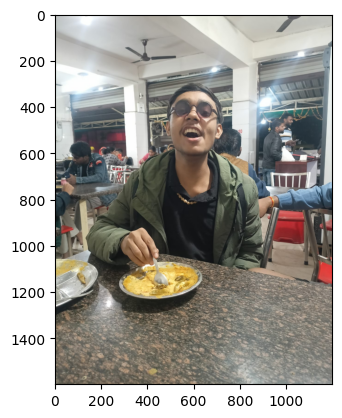

In [38]:

import cv2
img = cv2.imread('D:\deepL\data\happy\Ashu.jpg')
img1 = cv2.imread('D:\deepL\data\happy\jas.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show
#"D:\deepL\data\happy\jas.jpg"

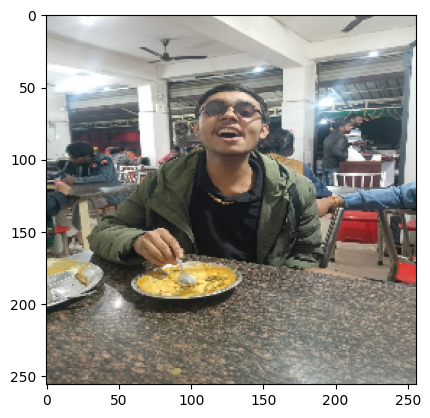

In [39]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:

import numpy as np
#By using np.expand_dims(resize / 255, 0), the shape becomes (1, height, width, channels)
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


array([[0.00045408]], dtype=float32)

In [41]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')


Predicted class is Happy


In [42]:
from tensorflow.keras.models import load_model
# Check if the directory exists
if not os.path.exists('models'):
    os.makedirs('models')

# Save the model
model.save(os.path.join('models', 'imageclassifier.h5'))
new_model = load_model(os.path.join('models', 'imageclassifier.h5'))



In [43]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


array([[0.00045408]], dtype=float32)

In [1]:
!pip install albumentations


  Using cached albumentations-2.0.1-py3-none-any.whl.metadata (38 kB)
  Using cached pydantic-2.10.6-py3-none-any.whl.metadata (30 kB)
  Using cached albucore-0.0.23-py3-none-any.whl.metadata (5.3 kB)
  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
Using cached albumentations-2.0.1-py3-none-any.whl (276 kB)
Using cached albucore-0.0.23-py3-none-any.whl (14 kB)
Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl (39.4 MB)
Using cached pydantic-2.10.6-py3-none-any.whl (431 kB)
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\deepL\\imageclassf\\Lib\\site-packages\\cv2\\cv2.pyd'
Check the permissions.



In [2]:
pip install --user albumentations


Note: you may need to restart the kernel to use updated packages.


ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.


In [1]:
import albumentations as A

ModuleNotFoundError: No module named 'albumentations'